In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from food.tools import *
from food.paths import *
from food.psql import *

import pandas as pd
import numpy as np

# !nbdev_build_lib

In [63]:
from transformers import DetrFeatureExtractor, DetrForSegmentation
from PIL import Image
import requests

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQywktoozOyUyYCcMJDpjSMqcwzeR_m23X67A&usqp=CAU'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50-panoptic')
model = DetrForSegmentation.from_pretrained('facebook/detr-resnet-50-panoptic')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# model predicts COCO classes, bounding boxes, and masks
logits = outputs.logits
bboxes = outputs.pred_boxes
masks = outputs.pred_masks


In [68]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
from PIL import Image

feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')


In [43]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")

Downloading:   0%|          | 0.00/271 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/245M [00:00<?, ?B/s]

In [69]:
from transformers import pipeline
pipe = pipeline("image-segmentation", device=2,model=model,feature_extractor=feature_extractor)

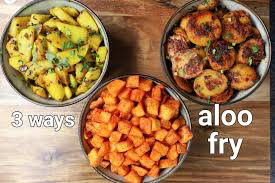

In [70]:
image

In [71]:
r = pipe([image])

In [72]:
pd.DataFrame(r[0])

,score,label,mask
0,None,wall,<PIL.Image.Image image mode=L size=275x183 at ...
1,None,floor,<PIL.Image.Image image mode=L size=275x183 at ...
2,None,table,<PIL.Image.Image image mode=L size=275x183 at ...
3,None,painting,<PIL.Image.Image image mode=L size=275x183 at ...
4,None,signboard,<PIL.Image.Image image mode=L size=275x183 at ...
5,None,food,<PIL.Image.Image image mode=L size=275x183 at ...
6,None,tray,<PIL.Image.Image image mode=L size=275x183 at ...
7,None,plate,<PIL.Image.Image image mode=L size=275x183 at ...
8,None,glass,<PIL.Image.Image image mode=L size=275x183 at ...


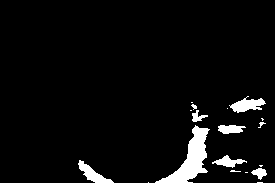

In [39]:
r[0][1]['mask']

In [35]:
bboxes.shape

torch.Size([1, 100, 4])

In [40]:
bboxes[:,:,4]

IndexError: index 4 is out of bounds for dimension 2 with size 4

In [44]:
bboxes[0,:,:]

tensor([[0.6515, 0.2453, 0.5809, 0.3579],
        [0.4439, 0.1619, 0.0713, 0.1149],
        [0.7144, 0.7493, 0.1403, 0.1429],
        [0.4614, 0.2074, 0.4625, 0.3641],
        [0.7646, 0.5778, 0.1335, 0.3114],
        [0.1091, 0.0202, 0.2137, 0.0399],
        [0.5333, 0.5977, 0.1901, 0.2553],
        [0.4046, 0.1744, 0.0790, 0.1287],
        [0.0291, 0.9641, 0.0554, 0.0675],
        [0.2743, 0.2918, 0.0863, 0.1068],
        [0.6983, 0.5103, 0.1590, 0.2581],
        [0.5000, 0.4990, 0.9983, 0.9982],
        [0.5255, 0.3601, 0.2639, 0.1531],
        [0.2865, 0.2483, 0.0722, 0.1693],
        [0.8409, 0.6771, 0.1010, 0.1429],
        [0.0846, 0.9602, 0.1654, 0.0758],
        [0.6253, 0.5028, 0.5701, 0.9061],
        [0.4243, 0.4991, 0.7670, 0.9621],
        [0.6549, 0.4793, 0.5155, 0.7025],
        [0.7640, 0.7394, 0.2822, 0.2656],
        [0.6682, 0.5217, 0.1931, 0.3140],
        [0.3939, 0.1647, 0.0549, 0.1063],
        [0.5262, 0.3270, 0.2747, 0.1321],
        [0.1839, 0.5147, 0.3649, 0